<a href="https://colab.research.google.com/github/drstannwoji2019/ML_Projects/blob/main/AnomalyDetection_ANLY530.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Transaction Amount  Transactions Per Day  Anomaly
0          574.507123             12.778533        1
1          479.260355             15.728250        1
2          597.153281              5.804297        1
3          728.454478             11.688908        1
4          464.876994              8.048072        1
5          464.879456              8.538624        1
6          736.881922              8.222818        1
7          615.115209              7.408028        1
8          429.578842             10.145565        1
9          581.384007              7.507150        1


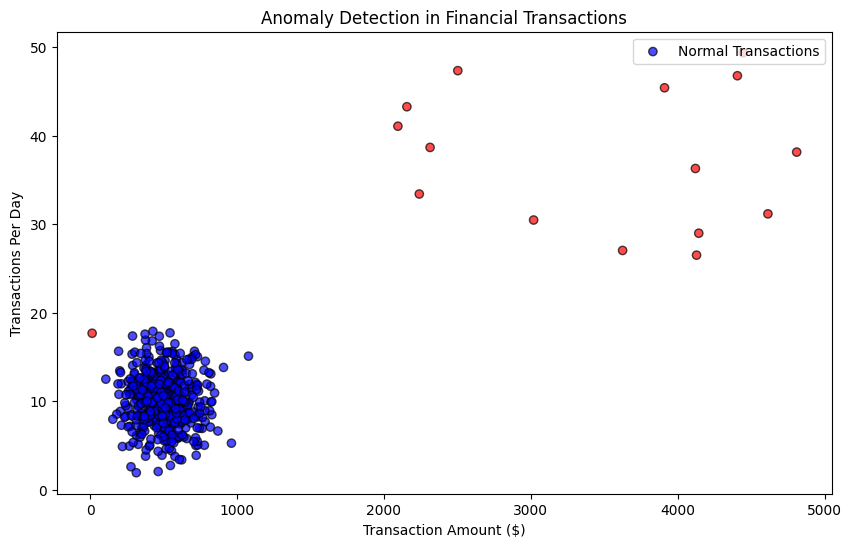

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Step 1: Generate Synthetic Financial Transaction Data
np.random.seed(42)
n_samples = 500

# Simulated features: Transaction Amount, Number of Transactions per Day
transaction_amounts = np.random.normal(loc=500, scale=150, size=n_samples)  # Normal transactions
num_transactions = np.random.normal(loc=10, scale=3, size=n_samples)

# Introduce anomalies (fraudulent transactions)
n_anomalies = 15
anomaly_amounts = np.random.uniform(2000, 5000, size=n_anomalies)  # Very high transaction amounts
anomaly_transactions = np.random.uniform(25, 50, size=n_anomalies)  # Unusually high transaction frequency

# Combine normal and fraudulent transactions
X_normal = np.column_stack((transaction_amounts, num_transactions))
X_anomaly = np.column_stack((anomaly_amounts, anomaly_transactions))
X_combined = np.vstack((X_normal, X_anomaly))  # Merge normal and anomalous transactions

# Step 2: Standardize the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_combined)

# Step 3: Apply Isolation Forest for Anomaly Detection
model = IsolationForest(n_estimators=100, contamination=0.03, random_state=42)
predictions = model.fit_predict(X_scaled)

# Step 4: Convert Results into a DataFrame
df_transactions = pd.DataFrame(X_combined, columns=['Transaction Amount', 'Transactions Per Day'])
df_transactions['Anomaly'] = predictions  # -1 indicates an anomaly

# Display the dataset with anomalies (for visualization)
print(df_transactions.head(10))  # Show first 10 transactions

# Step 5: Visualization of Detected Anomalies
plt.figure(figsize=(10, 6))
colors = np.array(['blue' if x == 1 else 'red' for x in predictions])
plt.scatter(df_transactions['Transaction Amount'], df_transactions['Transactions Per Day'],
            c=colors, edgecolors='k', alpha=0.7)
plt.xlabel('Transaction Amount ($)')
plt.ylabel('Transactions Per Day')
plt.title('Anomaly Detection in Financial Transactions')
plt.legend(['Normal Transactions', 'Anomalies'], loc='upper right')
plt.show()
